In [3]:
!pip install -q kaggle --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [72]:
!pip uninstall umap
!pip install umap-learn --quite

Found existing installation: umap 0.1.1
Uninstalling umap-0.1.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/umap-0.1.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/umap/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.10/dist-packages/umap/aligned_umap.py
    /usr/local/lib/python3.10/dist-packages/umap/distances.py
    /usr/local/lib/python3.10/dist-packages/umap/layouts.py
    /usr/local/lib/python3.10/dist-packages/umap/parametric_umap.py
    /usr/local/lib/python3.10/dist-packages/umap/plot.py
    /usr/local/lib/python3.10/dist-packages/umap/sparse.py
    /usr/local/lib/python3.10/dist-packages/umap/spectral.py
    /usr/local/lib/python3.10/dist-packages/umap/umap_.py
    /usr/local/lib/python3.10/dist-packages/umap/utils.py
    /usr/local/lib/python3.10/dist-packages/umap/validation.py
Proceed (Y/n)? Y
  Successfully uninstalled umap-0.1.1

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
 

In [4]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"shubh134mishra","key":"a1db907bda65e2fc619f1e5f0b3441d8"}'}

In [5]:
!chmod 600 /content/kaggle\ \(1\).json

!kaggle datasets download siddharthkumarsah/ships-in-aerial-images
!unzip ships-in-aerial-images.zip -d ships-in-aerial-images

Streaming output truncated to the last 5000 lines.
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0593_png.rf.33fd03bd0d9896e31b73ac56c1e458c8.txt  
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0594_png.rf.1a86349573567a368a653b5b39fff4af.txt  
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0594_png.rf.ff6551627101ade7c4ecd6887fa45546.txt  
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0595_png.rf.bc03f4a3bc686c5d239d8552ce57b5f5.txt  
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0597_png.rf.918ed233995c3645a1ca8d14bf35a81c.txt  
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0598_png.rf.94d8be92f98bf3ff36cf9f51b1e17bc9.txt  
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0598_png.rf.a5b224c7880ba832c9d6d5aba3123e28.txt  
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0599_png.rf.d215436f7b245cf0a244

# **Libraries :-**

In [73]:
import os
import cv2
import random
import numpy as np
from PIL import Image
import seaborn as sns
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# **Configurations :-**

In [7]:
dataset_path = "/content/ships-in-aerial-images/ships-aerial-images"

train_images_path = os.path.join(dataset_path, "train/images")
train_labels_path = os.path.join(dataset_path, "train/labels")

test_images_path = os.path.join(dataset_path, "test/images")
test_labels_path = os.path.join(dataset_path, "test/labels")

valid_images_path = os.path.join(dataset_path, "valid/images")
valid_labels_path = os.path.join(dataset_path, "valid/labels")

# **Exploratory Data Analysis :-**

In [9]:
num_train_images = len(os.listdir(train_images_path))
num_test_images = len(os.listdir(test_images_path))
num_valid_images = len(os.listdir(valid_images_path))

print("Training Images : {}".format(num_train_images))
print("Testing Images : {}".format(num_test_images))
print("Valid Images : {}".format(num_valid_images))

print("Total Images : {}".format(num_train_images + num_test_images + num_valid_images))

Training Images : 9697
Testing Images : 1573
Valid Images : 2165
Total Images : 13435


In [27]:
img = cv2.imread(os.path.join(valid_images_path, random.choice(os.listdir(valid_images_path))))

print("Image Dimensions : {} X {}".format(img.shape[0], img.shape[1]))
print("Image Channels : {}".format(img.shape[2]))

Image Dimensions : 416 X 416
Image Channels : 3


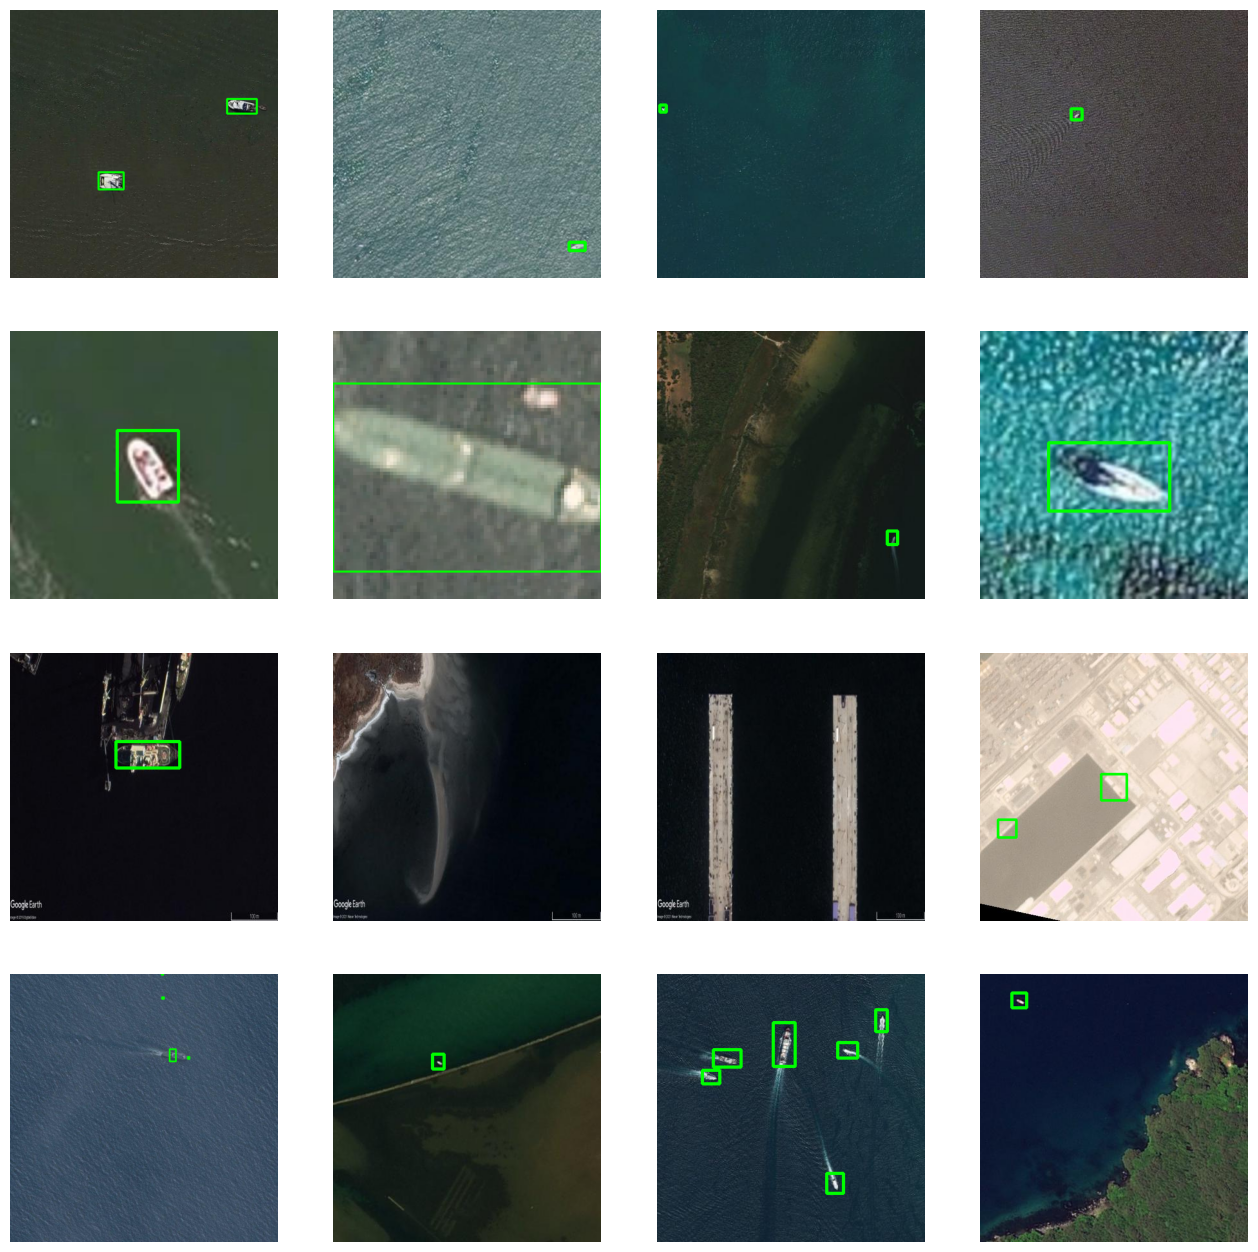

In [31]:
# Sample Images with Labels

random_img_paths = random.sample(os.listdir(valid_images_path), 16)

fig, axs = plt.subplots(4, 4, figsize=(16, 16))

for i, image_path in enumerate(random_img_paths):
  row, col = i // 4, i % 4

  image = cv2.imread(os.path.join(valid_images_path, image_path))

  label_file = os.path.splitext(image_path)[0] + ".txt"
  label_path = os.path.join(valid_labels_path, label_file)

  with open(label_path, "r") as f:
    labels = f.read().strip().split("\n")

  for label in labels:
    if len(label.split()) != 5:
        continue

    class_id, x_center, y_center, width, height = map(float, label.split())
    x_min = int((x_center - width/2) * image.shape[1])
    y_min = int((y_center - height/2) * image.shape[0])
    x_max = int((x_center + width/2) * image.shape[1])
    y_max = int((y_center + height/2) * image.shape[0])
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

  axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  axs[row, col].axis('off')

plt.show()

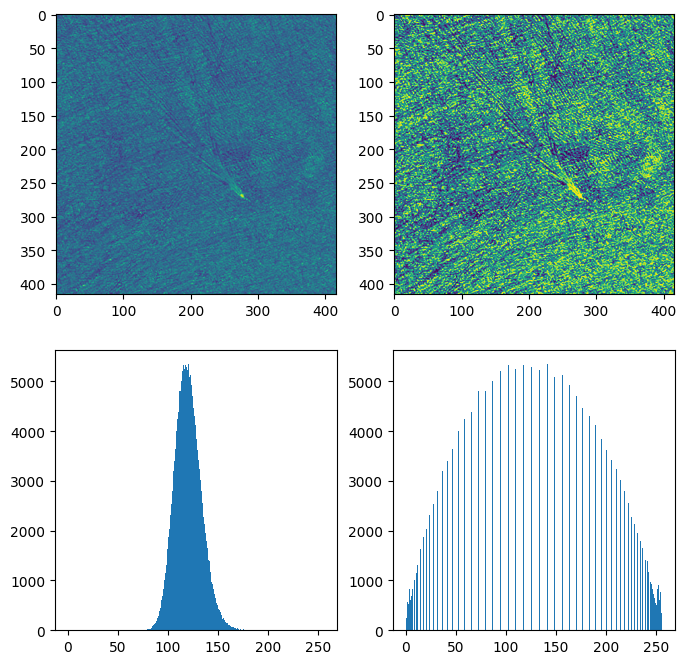

In [60]:
# Intensity Distribution in Random Image

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

random_img = cv2.imread(os.path.join(valid_images_path, random.choice(os.listdir(valid_images_path))), cv2.IMREAD_GRAYSCALE)
eq_random_img = cv2.equalizeHist(random_img)

axs[0, 0].imshow(random_img)
axs[0, 1].imshow(eq_random_img)
axs[1, 0].hist(random_img.ravel(), bins=256, range=(0, 256))
axs[1, 1].hist(eq_random_img.ravel(), bins=256, range=(0, 256))

plt.show()

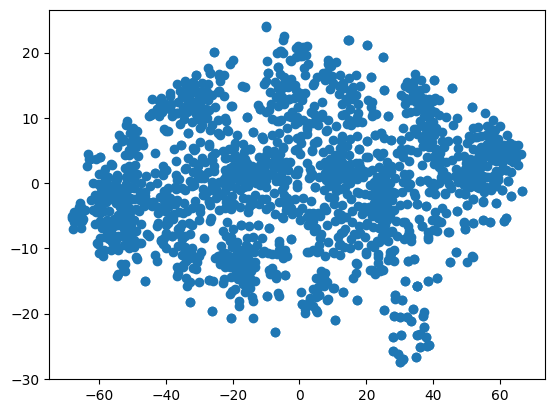

In [61]:
# Scatter-Plot for t-SNE Embedding (Probabilistic in Nature)

images = []

for filename in os.listdir(test_images_path):
    filepath = os.path.join(test_images_path, filename)
    if os.path.isfile(filepath):
        img = Image.open(filepath)
        img = img.convert('RGB')
        img = img.resize((50, 50))
        images.append(np.array(img).flatten())

# Apply t-SNE to the image data
images = np.array(images)
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
embeddings = tsne.fit_transform(images)

plt.scatter(embeddings[:, 0], embeddings[:, 1])
plt.show()

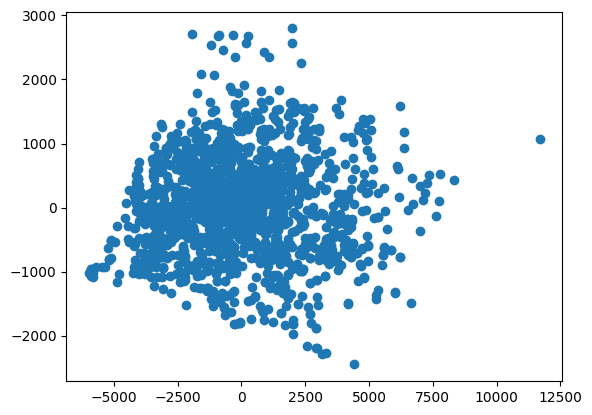

In [63]:
# Image Feature Visualization with PCA (Mathematical in Nature)

pca = PCA(n_components=2)
embeddings = pca.fit_transform(images)

plt.scatter(embeddings[:, 0], embeddings[:, 1])
plt.show()

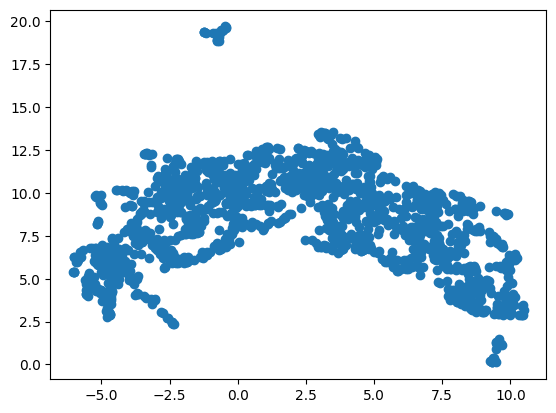

In [74]:
umap_embedding = umap.UMAP(n_neighbors=5, min_dist=0.3).fit_transform(images)

plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1])
plt.show()

<Axes: >

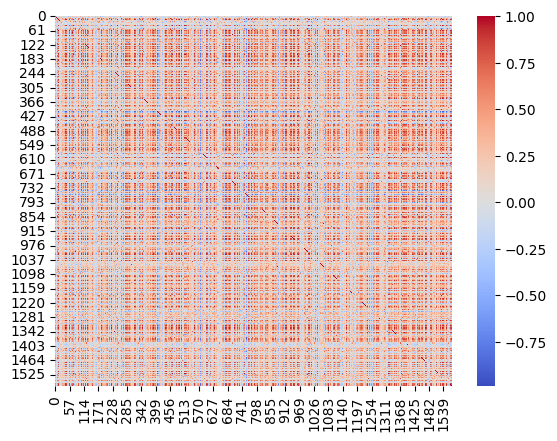

In [65]:
img_corr = np.corrcoef(images)
sns.heatmap(img_corr, cmap='coolwarm')